# Building a Neural Network
---
We will start by going over some important concepts:
## Linear Regression
This is a method of modelling relationships between 2+ independant variables and a dependant variable. Each independant variable has a weirght associated with it which determines how much it impacts on the final result, and this is multiplied by the value of the variable itself. A bias is also applied, which helps achieve a result if the unbiassed value is zero, or needs to be a certain size.
## Dot Product
Lovely further maths. The dot product can be used to determine how similar two vectors are. It is the sum of the products of each item in each vector (that sounds horrible, so I shall give an example). Take the two vectors 4i+2j and 3i+j. Their dot product is 14, which is 4x3 + 1x2. An example of how it determines similarity is with perpendicular vectors. The vectors i and j have a dot product of 0, as they are perpendicular. This shows they are completely unlike one another.
Beneath is an example of how the dot product of two vectors (represented as arrays) can be found using raw python:

In [1]:
# Define vectors
input_vector = [1.72, 1.23]
weight_1 = [1.26, 0]

# Calculate dot product
i1_prod = input_vector[0] * weight_1[0]
i2_prod = input_vector[1] * weight_1[1]
dp_iv_w1 = i1_prod + i2_prod

# Output the dot product
print(f"The dot product is {dp_iv_w1}")

The dot product is 2.1672


### Doing it a lot quicker...
As much as it is useful to see how this works in raw python, it is a lot quicker to use **numpy** to do it...

In [2]:
import numpy as np
dp_iv_w1 = np.dot(input_vector, weight_1)
print(f"The dot product from numpy is {dp_iv_w1}")

The dot product from numpy is 2.1672


### Comparing values
As I mentioned earlier, the dot product can be used to measure how similar two vectors are. Lets find the dot product of another vector and the input vector and compare them, to see which is more alike to the input vector.

In [3]:
# Define new vector
weight_2 = [2.17, 0.32]
dp_iv_w2 = np.dot(input_vector, weight_2)
print(f"The dot product with weight 2 is {dp_iv_w2}")

The dot product with weight 2 is 4.1259999999999994


We can see that 2.2 < 4.1, and therefore can determine that weight 2 is more alike the input vector than weight 1 (building on the idea from earlier that 0 represents 2 completely unlike vectors). This can clearly be seen when we plot the vectors on a graph:
![graph of the vectors](https://realpython.com/cdn-cgi/image/width=1157,format=auto/https://files.realpython.com/media/three_vectors_2d.9d220456ff49.png)

## Linear vs Nonlinear Functions
More fun maths! The products and sums we have done so far have all been **linear**, meaning they can be traced back to their original value via some process. This can be useful, but after a while makes adding complexity to a network difficult. Say you have 10 layers of linear functions, each of which adds a value to the result of the previous. Although each layer is useful, the role of all 10 linear functions can be done by a single linear layer (adding the sum of all the values at once). This shows that when using multiple linear functions, the same result can always be achieved with fewer layers. To get around this, we can use **nonlinear functions** (also known as **activation functions**),specifically **the sigmoid function**. This resricts all outputs to be between 0 and 1, and is as follows:   

$ S(x) = \frac{1}{1+e^{-x}} $

In [4]:
# Example use of the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-1 * x))

print(f"Using the sigmoid function, 2.5 becomes {sigmoid(2.5)}")

Using the sigmoid function, 2.5 becomes 0.9241418199787566


As you can see, the number has been mapped to be between 0 and 1! You may be wondering what the output value actually represents, and this is based on a Bernouilli distribution, which in itself is a special case of the Binomial distribution where n=1 (so the only outcomes are P(X=x)=1 or =0). Essentially, large positive inputs are represented closer to 1 and smaller negative inputs (further from 0) are represented towards 0.   
In our case, we will round values to either 0 or 1, to limit the outputs of our network to 0 and 1. That is also why this will be used in our last layer.

## Back to the Neural network...
Let us first define what we want our AI to do. We will aim to make predictions that can only have the outcome 0 or 1 (a classification problem) and determine which one our input variable maps to. To keep things simple, we will only use numbers, but this is a similar concept to all those cool programs you see that can predict the contents of an image, just a lot more basic. We will simply aim to get a result from 2 possible inputs, as shown here:
| Input | Output we want |
| ------| ---------------|
| 1.66, 1.56 | 1 |
| 2, 1.5 | 0 |

### Layers
We will use 2 layers in our network. The first will find the dot product of the input with our weight vectors, and then the second will run this result through the sigmoid function and map our result to either 0 or 1. As explained earlier, we only need 1 linear function layer, so having 1 linear and 1 nonlinear works well.
### Predicting
Lets tie this all together. Below is an implimentation which just takes our input vector, a fixed weight, and a bias. This currently uses no adjustment of bias or self-correction, just an initial guess to start us off.

In [5]:
# Define our vectors within numpy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

# The neural network layers
def predict(inp, weights, bias):
    layer_1 = np.dot(input_vector, weights_1) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

# Make a prediction using our vectors
prediction = predict(input_vector, weights_1, bias)

print(f"The result of our first prediction is {prediction[0]}")

The result of our first prediction is 0.7985731042296965


As our result is greater than 0.5, this maps to 1, and thus the network was successful! Yippee! Now let's test it with our other input, (2, 1.5).

In [6]:
# Redefine our input vector
input_vector = np.array([2, 1.5])

# Make the new prediction
prediction = predict(input_vector, weights_1, bias)

print(f"The result of our second prediction is {prediction[0]}")

The result of our second prediction is 0.8710191478537642


0.87 also rounds to 1, which is not the result we wanted (oh dear). Lets look at how to our model can improve itself and correct this mistake.

## Training the model
There are a few stages involved in adjusting our weights to fix the model.
1. Calculate prediction error
2. Adjust weights to reduce error
3. More stuff that I need to ADD HERE

### Prediction error
The function we use to find the prediction error is called the **cost function**, and we will use **mean squared error (MSE)** to calculate this. MSE works by squaring the difference between the target and the predicted value, which ensures it is always a positive value. Squaring the value also means that larger errors create larger values and smaller errors have smaller values. Lets find the MSE for our incorrect prediction:

In [7]:
# Define our target and calculate MSE
target = 0
mse = np.square(prediction - target)
print(f"Prediction of {prediction[0]} has a MSE of {mse[0]}")

Prediction of 0.8710191478537642 has a MSE of 0.7586743559278976


So we have a value of 0.76 for our prediction error, cool!  
Now we want to figure out how to reduce this (warning, this is where the fun maths comes in).  
If we treat (prediction - target) as a function, np.square produces a **quadratic curve** where the y-axis represents our error value. In order to minimise our y-value, we can differentiate! We use this inside a thing called the **gradient descent algorithm**, which works by differentiating the function and comparing the gradient at your error value to 0. If it is positive, the prediction was too high and should be reduced, and vice versa for a negative value. Lets try this out on our value:

In [8]:
# Differentiate our value (x^2 becomes 2x)
derivative = 2 * (prediction - target)
print(f"The derivative at our point is {derivative[0]}")

The derivative at our point is 1.7420382957075284


Great! As the derivative is positive, we know we must reduce it.  
Inside our gradient descent algorithm, we use this value for the derivative (gradient) to change our weights and recalculate a new prediction. There is one problem though. If we have large values for our derivative, we will just keep fluctuating either side of the minimum value (like a pendulum). One time we will be over and move back under, and the next we will move back over. To reduce this from happening, we use **the alpha parameter**, or **learning rate**. This is a fraction which the derivative is multiplied by in order to reduce the incriments by which the weights are changed. Finding the ideal learning rate is a matter of experimenting with values! We can impliment this later, but for now lets just see how using the derivative itself impacts our error.

In [9]:
# Reduce weights by the value of the derivative
weights_1 -= derivative

# Create function to calculate MSE
def calc_mse(prediction, target):
    return (prediction - target) ** 2

# Re-predict for both values
prediction_1 = predict([1.66, 1.56], weights_1, bias)
prediction_2 = predict([2, 1.5], weights_1, bias)

# Calculate MSE for both values
mse_1 = calc_mse(prediction_1, 1)
mse_2 = calc_mse(prediction_2, 0)

print(f"For prediction 1: target = 1, prediction = {prediction_1[0]}, error = {mse_1[0]}")
print(f"For prediction 2: target = 0, prediction = {prediction_2[0]}, error = {mse_2[0]}")

For prediction 1: target = 1, prediction = 0.014962479449257616, error = 0.9702989168927542
For prediction 2: target = 0, prediction = 0.014962479449257616, error = 0.00022387579126945649


Nice! Our prediction 2 is now correct and has a far smaller error! Slight problem though, our first prediction is now wrong :(  
This is not neccessarily a bad thing. If our model always predicted correctly, it could be **overfitted**, meaning it is too well adapted to the training data and simply remembers the numbers rather than learning to recognise them. In this case though, we can still train our model more to make it better.

## Backprobagation
This is another scary word, but is essentially just working back through the network.  
We use backprobagation to find better values for our weights and biases, using similar principles to what we did earlier with differentiation. This time we will use the [chain rule](https://www.youtube.com/watch?v=BIu0m2DObAA) to find the derivative of not just the function $x^2$, but our whole function, $(prediction - target)^2$. The chain rule is needed as we are prerfoming a function (squaring) on another function (prediction - target). Another way of looking at this is to work backwards through our two layers (known as a **backwards pass**). We have the first layer (dot product) and second layer (sigmoid), so working backwards gives us the process of error --> sigmoid --> dot product --> bias. Using the chain rule, where we want to differentiate the error value with respect to the weights, this gives us the following formula:  
$\frac{d(error)}{d(bias)} = \frac{d(error)}{d(sigmoid)} \times \frac{d(sigmoid)}{d(dot product)} \times \frac{d(dot product)}{d(bias)}$  
Now let's actually do this with some code...

In [10]:
# Set prediction variable (we are working with our prediction for option 2)
prediction = prediction_2

# Function to find the derivative of the sigmoid function (with value x)
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

# Calculate partial derivatives to work towards derivative of error with respect to weights
derror_dsigmoid = 2*(prediction-target)
layer_1 = np.dot(input_vector, weights_1) + bias
dsigmoid_ddotprod = sigmoid_deriv(layer_1)
ddotprod_dbias = 1  # Is an independant variable, so differentiates to 1
derror_dbias = derror_dsigmoid * dsigmoid_ddotprod * ddotprod_dbias

## Making the network (again...)
Now we (hopefully) know what is going on, its time to make a class for our network!  
We will define our weights and bias as random and then use the **backprobagation algorithm** to improve their values through training. The learning rate is passed as a parameter.  
Also, because python OOP isn't that great, we will denote private functions with an underscore (e.g. _foo()).

In [11]:
class NeuralNetwork:
    # Constructor method
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    # Sigmoid function (layer 2)
    def _sigmoid(self, x):
        return 1/(1+np.exp(-x))

    # Derivative of sigmoid (backprogagation)
    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    # Make a prediction using the network
    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    # Find the gradients of the error functions (backprobagation)
    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2*(prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        derror_dweights = derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        return derror_dbias, derror_dweights

    # Change weight and bias parameters (result of backprobagation)
    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (derror_dweights * self.learning_rate)

    # Training function
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a random bit of data to train on
            rand_data_index = np.random.randint(len(input_vectors))
            rand_data = input_vectors[rand_data_index]
            rand_data_target = targets[rand_data_index]

            # Update paramaters based on training data
            derror_dbias, derror_dweights = self._compute_gradients(rand_data, rand_data_target)
            self._update_parameters(derror_dbias, derror_dweights)

            # Find the error over all iterations
            if current_iteration % 100 == 0:
                cumulative_err = 0
                # Calculate the error for every item of data (instance) in the training set
                for instance_index in range(len(input_vectors)):
                    data_point = input_vectors[instance_index]
                    data_target = targets[instance_index]

                    # Find error and add to total
                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)  # Find MSE
                    cumulative_err += error
                # Add new cum err to array of tots
                cumulative_errors.append(cumulative_err)
        # Having calculated errors, return all of the values
        return cumulative_errors

The `train` function is a bit of a weird one. While it does train the network over a certain number of iterations, it also keeps track of the total error having made a prediction for every item in the data set, every 100th training iteration. This helps us keep track of the progress the network has made as we go along.

Now we have our class, lets give it a go!

In [12]:
learning_rate = 0.1
neural_network = NeuralNetwork(learning_rate)
neural_network.predict(input_vector)

np.float64(0.4828995011722989)

It works! Lets get to training!

## Training Montage
Get the hype music playing, it's time for a training montage!  
Although 2 inputs have sufficed until now, we will now try stepping things up a bit, with 8! We will still have 2 ouputs, as this is what our sigmoid function permits.  
Let's start by defining these new inputs and their associated targets:

In [13]:
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1]
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

And now we have to instantiate our network and get training.

In [14]:
learning_rate = 0.1
nn = NeuralNetwork(learning_rate)
errors = nn.train(input_vectors, targets, 10000)  # Ten thousand iterations! Woah!

Now we can draw a graph to show how the error has changed over time.

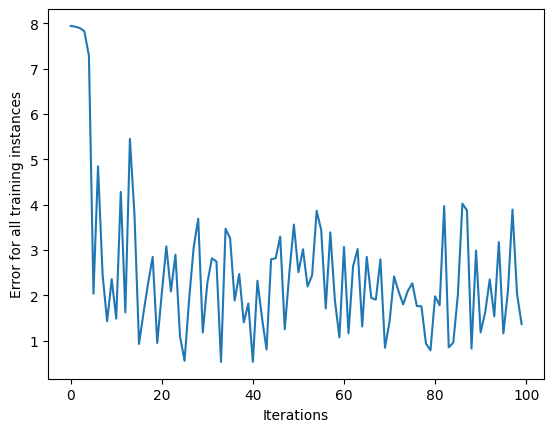

In [15]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("err_evolution.png")

Yay! As you can see, our error is decreasing over time! It also plateaus after a while, which is good. If our error kept decreasing closer and closer to 0, the network would have become **overfitted** to the training data, and not be able to adapt to new data.

# The Real World
Sure it is great to have this model to predict an abstract result with some numbers we have made up, but there in lies the problem, this is really abstract! Moving away from the tutorial I have been following, I am now going to build a model with the aim of predicting if a user will be aproved for a loan or not.  
We will use [this](https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset) dataset of 2000 instances, and to start with we will use the same network we already have to see what results this creates.